First three code chunk are pip installation steps, that are required to import the package, so, if your system doesn't already have Keras,TensorFlow and OpenCV, you need to download and install them using pip command mentioned below.

In [ ]:
#download and install the package keras 
pip install keras

#Run this code block only to install keras (if not already installed in system)

In [ ]:
#download and install the package tensorflow 
pip install tensorflow

#Run this code block only to install keras (if not already installed in system)

In [ ]:
#download and install the package openCV 
pip install opencv-python

#Run this code block only to install keras (if not already installed in system)

In [ ]:
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
from keras.optimizers import Adam
from keras.preprocessing import image
import cv2
import datetime
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator
train_data_generator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_data_generator = ImageDataGenerator(rescale=1./255)

data_train = train_data_generator.flow_from_directory(
        '--PATH/project-dakshkhanna/dataset/train/', #add path for your saved directory
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

data_test = test_data_generator.flow_from_directory(
        '--PATH/project-dakshkhanna/dataset/test/', #add path for your saved directory
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

model_saved=model.fit_generator(
        data_train,
        epochs=10,
        validation_data=data_test,

        )

model.save('mymodel.h5',model_saved)

In [8]:
loss_val = model_saved.history['val_loss']
loss_val

[0.11674802005290985,
 0.08721625804901123,
 0.10132082551717758,
 0.10099669545888901,
 0.07510685920715332,
 0.08509940654039383,
 0.09002131968736649,
 0.07137857377529144,
 0.0783785954117775,
 0.07666359096765518]

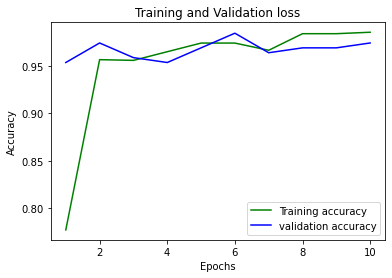

In [9]:
loss_train = model_saved.history['accuracy']
loss_val = model_saved.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
mymodel=load_model('mymodel.h5')
#Add the path to your saved directory
#test_image=tf.keras.utils.load_img(r'/Users/dakshkhanna/Desktop/project-dakshkhanna/dataset/test/with_mask/1-with-mask.jpg',
test_image=tf.keras.utils.load_img(r'--PATH /project-dakshkhanna/dataset/test/with_mask/1-with-mask.jpg',
                          target_size=(150,150,3))
test_image
test_image=tf.keras.preprocessing.image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
mymodel.predict(test_image)[0][0]

# IMPLEMENTING LIVE DETECTION OF FACE MASK

model_det=load_model('mymodel.h5')

cap=cv2.VideoCapture(0)
#face_cascade=cv2.CascadeClassifier('/Users/dakshkhanna/Desktop/project-dakshkhanna/haarcascade_frontalface_default.xml')
face_cascade=cv2.CascadeClassifier('--PATH/project-dakshkhanna/haarcascade_frontalface_default.xml') #Add path for your saved directory

while cap.isOpened():
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        test_image=tf.keras.utils.load_img('temp.jpg',target_size=(150,150,3))
        test_image=tf.keras.preprocessing.image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=model_det.predict(test_image)[0][0]
        if pred==1:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(img,'Not Wearing Mask',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,1,(0,0,255),3)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,'Wearing Mask',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,1,(0,255,0),3)
        datet=str(datetime.datetime.now())
        cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
          
    cv2.imshow('img',img)
    
    if cv2.waitKey(1)==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 22ms/step


KeyboardInterrupt: 